<a href="https://colab.research.google.com/github/KrzysztofDrobnik/PUM_Ptojekt_2025/blob/main/Project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#import potrzebnych bilbiotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#wczytanie pliku z danymi
df = pd.read_csv('taxi_trip_pricing (1).csv')

In [25]:
#podstawowe miary statystyczne
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [26]:
#sprawdzenie podstawowych danych o df
wiersze, kolumny = df.shape
print("Liczba wierszy:", wiersze)
print("Liczba kolumn:", kolumny)

df.info()

Liczba wierszy: 1000
Liczba kolumn: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [27]:
#usunięcie dupilkatów danych
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [28]:
#połaczenie zmiennych "Per_Minute_Rate" oraz "Trip_Duration_Minutes" w jedną zmienną będącą ich iloczynem
df["Time_Cost"] = df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
df.drop(columns=["Per_Minute_Rate", "Trip_Duration_Minutes"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    950 non-null    float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     950 non-null    float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           950 non-null    float64
 7   Per_Km_Rate         950 non-null    float64
 8   Trip_Price          951 non-null    float64
 9   Time_Cost           902 non-null    float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


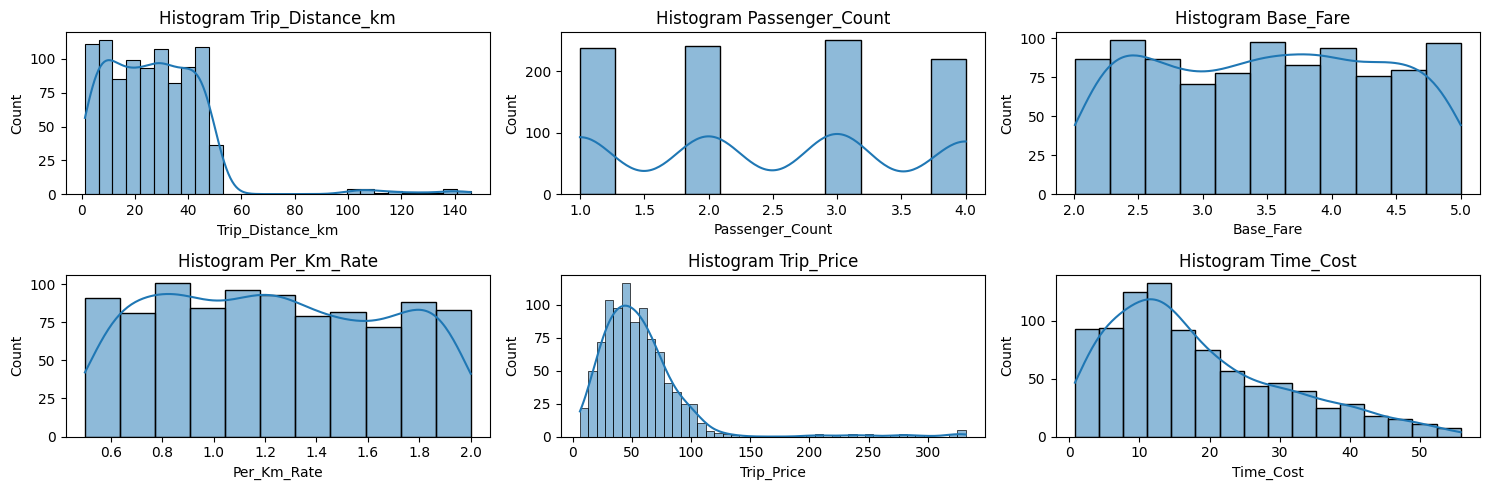

In [29]:
#sprawdzanie rozkładów zmiennych w celu stwierdzenie czy lepiej zastąpić wartości puste średnią czy medianą (lub ewentualnie inną statystyką)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.histplot(df['Trip_Distance_km'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram Trip_Distance_km')

sns.histplot(df['Passenger_Count'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram Passenger_Count')

sns.histplot(df['Base_Fare'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histogram Base_Fare  ')

sns.histplot(df['Per_Km_Rate'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram Per_Km_Rate')

sns.histplot(df['Trip_Price'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histogram Trip_Price')

sns.histplot(df['Time_Cost'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Histogram Time_Cost')

plt.tight_layout()
plt.show()

In [30]:
#rozkład zmiennej Trip_Distance_km - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkład zmiennej Passenger_Count - zmienna dyskretna, przyjmowane wartości z kilku możliwych opcji - najlepiej zastąpić wartości puste modą
#rozkład zmiennej Base_Fare - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Per_Km_Rate - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Trip_Price - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkłąd zmiennej Time_Cost - skośnt prawostronnie - najlepiej zastąpić wartości puste medianą

trip_distance_median = df['Trip_Distance_km'].median()
passenger_count_mode = df['Passenger_Count'].mode()[0]
base_fare_mean = df['Base_Fare'].mean()
per_km_rate_mean = df['Per_Km_Rate'].mean()
trip_price_median = df['Trip_Price'].median()
time_cost_median = df['Time_Cost'].median()

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(trip_distance_median)
df['Passenger_Count'] = df['Passenger_Count'].fillna(passenger_count_mode)
df['Base_Fare'] = df['Base_Fare'].fillna(base_fare_mean)
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(per_km_rate_mean)
df['Trip_Price'] = df['Trip_Price'].fillna(trip_price_median)
df['Time_Cost'] = df['Time_Cost'].fillna(time_cost_median)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [31]:
#zaokrąglenie wartości w kolumnach do 2 miejsc po przecinku (w tych kolumnach dużo wartości z bardzo długim rozwinięciem dziesiętnym)
df[['Trip_Distance_km', 'Trip_Price', 'Time_Cost']] = df[['Trip_Distance_km', 'Trip_Price', 'Time_Cost']].round(2)

In [32]:
#sprawdzenie wartości dla zmiennych tekstowych
text_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for column in text_columns:
    print(df[column].value_counts())
    print("\n")

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64


Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64


Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64




In [33]:
#sprawdzenie jaki procent danych stanowią brakujące dane
braki_procent = df.isnull().sum() / len(df) * 100
braki_procent = braki_procent[braki_procent > 0]
print(braki_procent)


Time_of_Day           5.0
Day_of_Week           5.0
Traffic_Conditions    5.0
Weather               5.0
dtype: float64


In [34]:
#Wartości puste stanowią 5% obserwacji, przy dosyć małej próbie (1000 obserwacji) usunięcie wszsytkic wartości pustych może zaburzyć model
#zastępujemy wartości puste modą

text_columns_to_transform = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for col in text_columns_to_transform:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         1000 non-null   object 
 2   Day_of_Week         1000 non-null   object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  1000 non-null   object 
 5   Weather             1000 non-null   object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [35]:
#zmienne tekstowe na zmienne numeryczne
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print(df.head())

   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            2            0              3.0   
1             47.59            0            0              1.0   
2             36.87            1            1              1.0   
3             30.33            1            0              4.0   
4             25.83            1            0              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Trip_Price  Time_Cost  
0                   1        0   3.560000         0.80       36.26      17.22  
1                   0        0   3.502989         0.62       50.07      17.45  
2                   0        0   2.700000         1.21       52.90       5.59  
3                   1        0   3.480000         0.51       36.47      17.52  
4                   0        0   2.930000         0.63       15.62       7.24  


In [36]:
#IQR -  tak jak bylo na zajeciach - usuwanie outlierów

Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
df.info()
#usunięcie 60 wartości odstających - akceptowalne

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    940 non-null    float64
 1   Time_of_Day         940 non-null    int64  
 2   Day_of_Week         940 non-null    int64  
 3   Passenger_Count     940 non-null    float64
 4   Traffic_Conditions  940 non-null    int64  
 5   Weather             940 non-null    int64  
 6   Base_Fare           940 non-null    float64
 7   Per_Km_Rate         940 non-null    float64
 8   Trip_Price          940 non-null    float64
 9   Time_Cost           940 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 80.8 KB


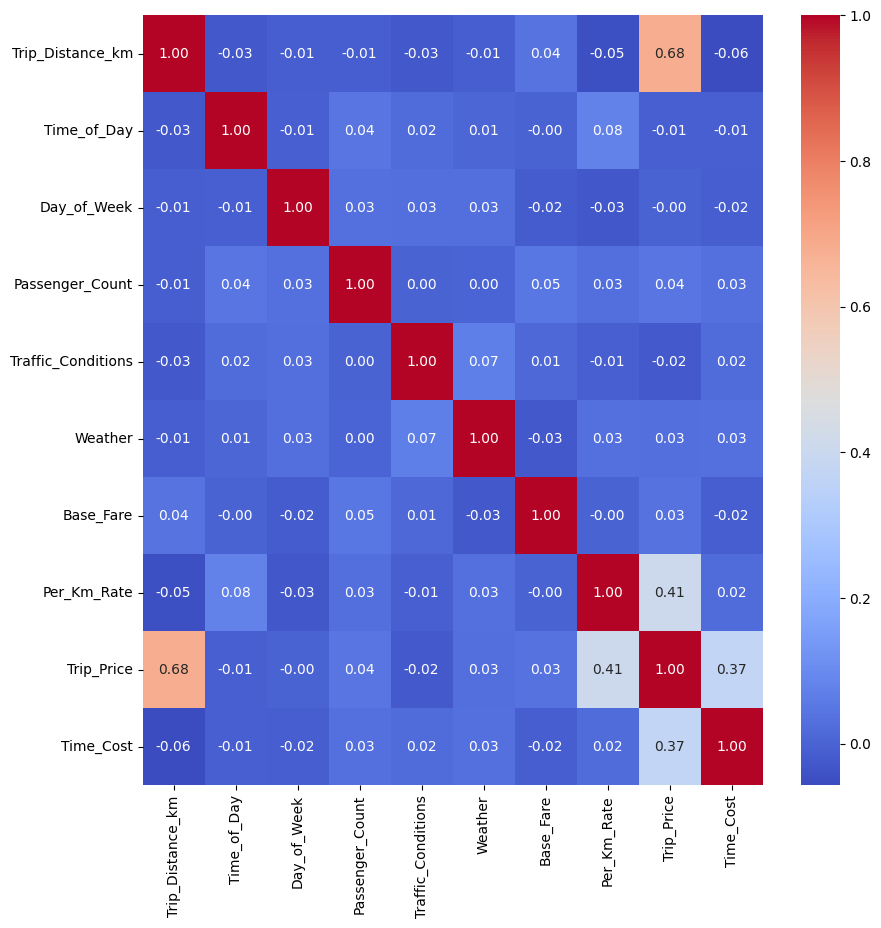

In [38]:
# Korelacja

corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


#WAŻNE - zmienna celu to Trip_price, więc korelacja z nia moze byc

In [39]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#BASE FARE DO USUNIĘCIA - BASE_FARE VIF > 10. PER_KM_RATE > 7 - też do usunięcia.
#Reszta to mała współliniowosć, wiec powinno być dobrze po usunięciu tych dwóch elementów

            variables        VIF
0    Trip_Distance_km   3.840006
1         Time_of_Day   2.013246
2         Day_of_Week   1.412971
3     Passenger_Count   5.851137
4  Traffic_Conditions   3.591028
5             Weather   1.346923
6           Base_Fare  11.206672
7         Per_Km_Rate   7.764282
8           Time_Cost   3.374550


In [40]:
df.drop(
    columns = [ 'Base_Fare', 'Per_Km_Rate'],
    inplace = True,
)



In [41]:
y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#teraz okej

            variables       VIF
0    Trip_Distance_km  3.220224
1         Time_of_Day  1.919074
2         Day_of_Week  1.401283
3     Passenger_Count  4.512657
4  Traffic_Conditions  3.222832
5             Weather  1.336229
6           Time_Cost  3.041447


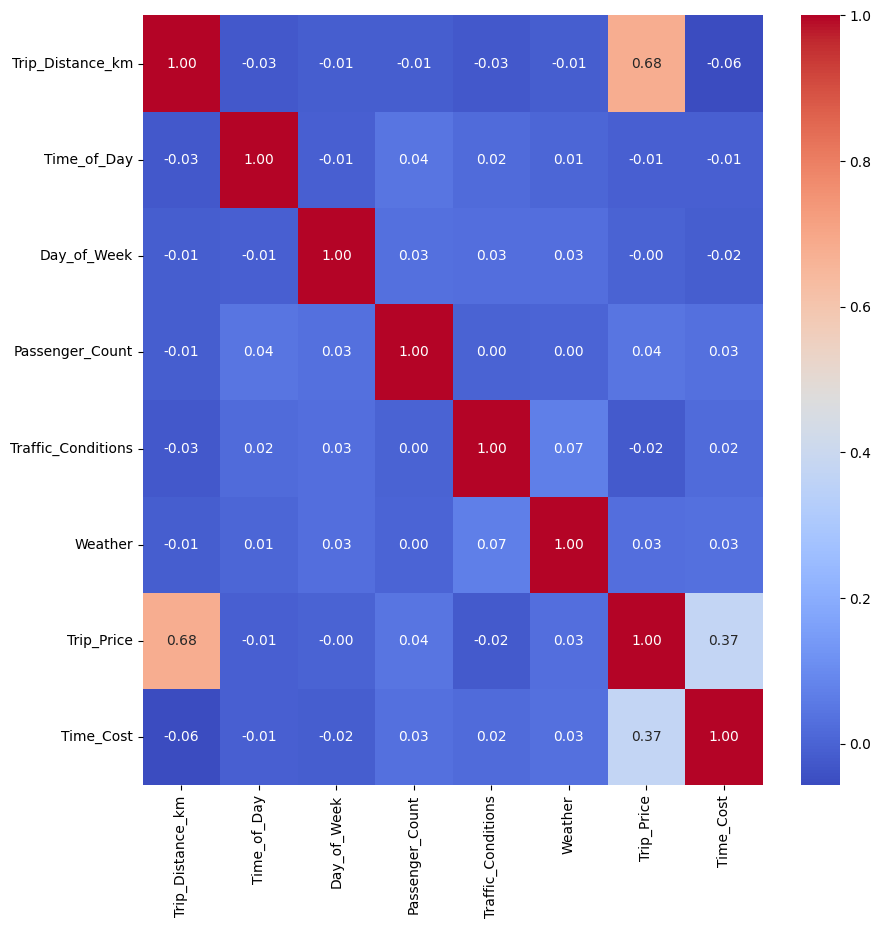

In [42]:
# Korelacja - próba 2


corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()




In [43]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,19.35,2,0,3.0,1,0,36.26,17.22
1,47.59,0,0,1.0,0,0,50.07,17.45
2,36.87,1,1,1.0,0,0,52.90,5.59
3,30.33,1,0,4.0,1,0,36.47,17.52
4,25.83,1,0,3.0,0,0,15.62,7.24


In [44]:
#standaryzacja

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled  = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


df_scaled.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,-0.405674,0.922865,-0.652996,0.459179,-0.276559,-0.584619,-0.642754,0.064193
1,1.613665,-1.011345,-0.652996,-1.397286,-1.674224,-0.584619,-0.022514,0.086531
2,0.847117,-0.044240,1.531403,-1.397286,-1.674224,-0.584619,0.104589,-1.065358
3,0.379466,-0.044240,-0.652996,1.387412,-0.276559,-0.584619,-0.633322,0.093330
4,0.057687,-0.044240,-0.652996,0.459179,-1.674224,-0.584619,-1.569745,-0.905104


---

Model 1

 lasso - tak gpt podpowiedział - R^2 = 0.61

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)

#train test split

x = df_scaled.drop(columns=['Trip_Price'])
y = df_scaled['Trip_Price']



In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lasso.fit(x_train, y_train)



Lasso(alpha=0.1, random_state=42)

In [ ]:
y_pred = lasso.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Squared Error: 0.4084476163351744
R^2 Score: 0.6074744664568534


Dla alfa = 0.1 -> R^2  = 0.61
Dla alfa = 0.2 -> R^2 = 0.5

---
Model 2 - Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, random_state=42)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2:", r2_score(y_test, y_pred_ridge))



MSE: 0.38242737565076834
R^2: 0.6324803875323879


Dla jakiejkolwiek alfy R^2 wynosi 0.63

---

Model 3 - model Liniowy

In [58]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R^2:", r2_score(y_test, y_pred_linear))

MSE: 0.3823732188452223
R^2: 0.6325324332002822


R^2 tez 0.63

---

Model 4 - drzewo decyzyjne

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))

MSE: 0.4472914064456399
R^2: 0.5701448828623771


Njagorszy model R^2 = 0.57